## Ejercicio de aprendizaje no supervisado

## Clustering

In [6]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

warnings.filterwarnings('ignore')

In [8]:
#Cargamos el dataset y lo mostramos
data = pd.read_csv("Mall_Customers.csv")

print("Información del dataset:")
print(data.info())

print("\nPrimeras 5 filas:")
print(data.head())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Primeras 5 filas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
print("\nResumen estadístico:")
print(data.describe())

print("\nValores nulos por columna:")
print(data.isnull().sum())


Resumen estadístico:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
#Limpieza del dataset
data_cleaned = data.drop(['CustomerID', 'Gender'], axis=1)

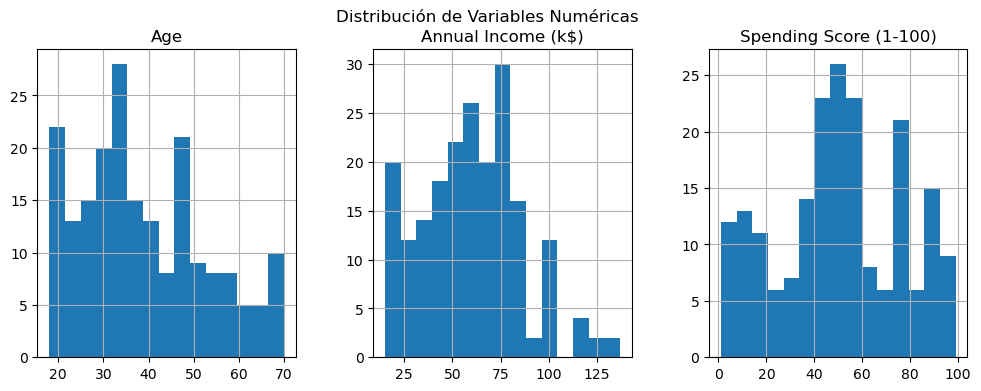

In [14]:
#visualizamos el dataset
# Histograma
data_cleaned.hist(bins=15, figsize=(12, 4), layout=(1, 3))
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

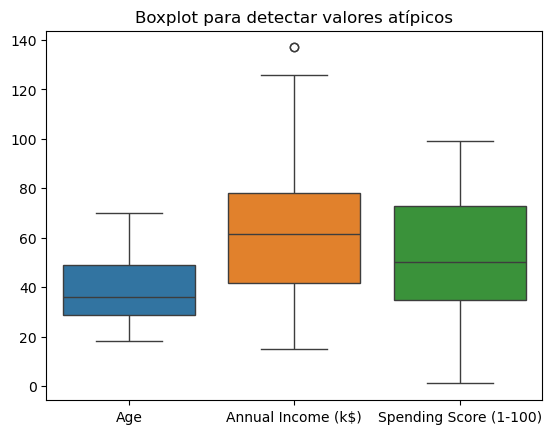

In [16]:
# Boxplot
sns.boxplot(data=data_cleaned)
plt.title("Boxplot para detectar valores atípicos")
plt.show()

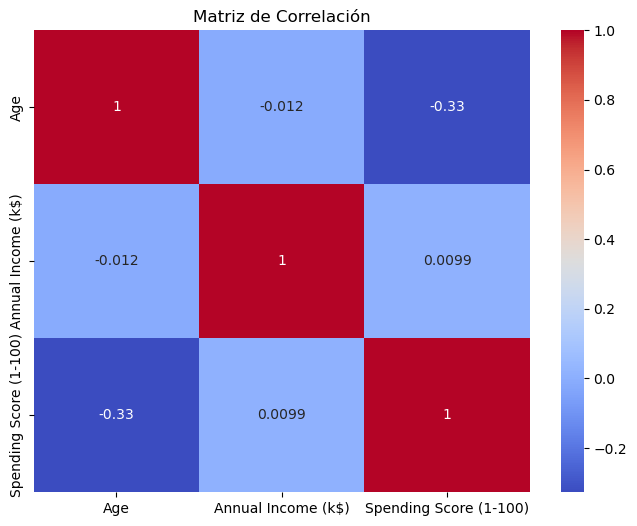

In [18]:
# Matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [20]:
#Escalamos las variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

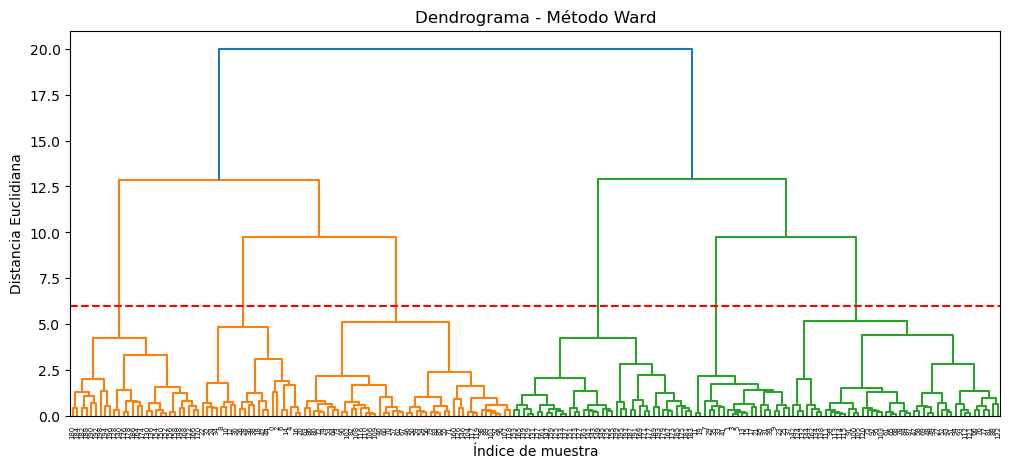

In [22]:
#Dendrograma
plt.figure(figsize=(12, 5))
link_matrix = linkage(X, method='ward')
dendrogram(link_matrix)
plt.axhline(y=6, color='r', linestyle='--')
plt.title("Dendrograma - Método Ward")
plt.xlabel("Índice de muestra")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [24]:
#Coeficiente de correlación cofenética
X_dist = pdist(X)
Z = linkage(X, 'ward')
coef_cofenetico = cophenet(Z, X_dist)[0]
print(f"\nCoeficiente de correlación cofenética: {coef_cofenetico:.4f}")


Coeficiente de correlación cofenética: 0.6262


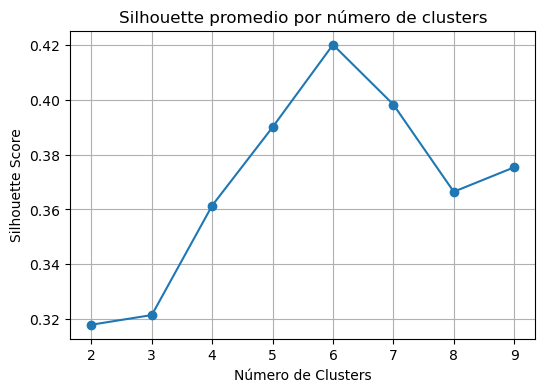

In [28]:
#Identificar número óptimo de clusters con Silhouette
range_n_clusters = range(2, 10)
valores_silhouette = []

for n in range_n_clusters:
    modelo = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward')
    etiquetas = modelo.fit_predict(X)
    score = silhouette_score(X, etiquetas)
    valores_silhouette.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, valores_silhouette, marker='o')
plt.title("Silhouette promedio por número de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [36]:
#Evaluación de métricas
modelo_final = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = modelo_final.fit_predict(X)

In [38]:
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Silhouette Score:", silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", calinski_harabasz_score(X, labels))
print("Índice de Davies-Bouldin:", davies_bouldin_score(X, labels))


Medidas de calidad para Clustering Jerárquico:
Silhouette Score: 0.39002826186267214
Índice de Calinski-Harabasz: 107.82656032570374
Índice de Davies-Bouldin: 0.9162886109753661


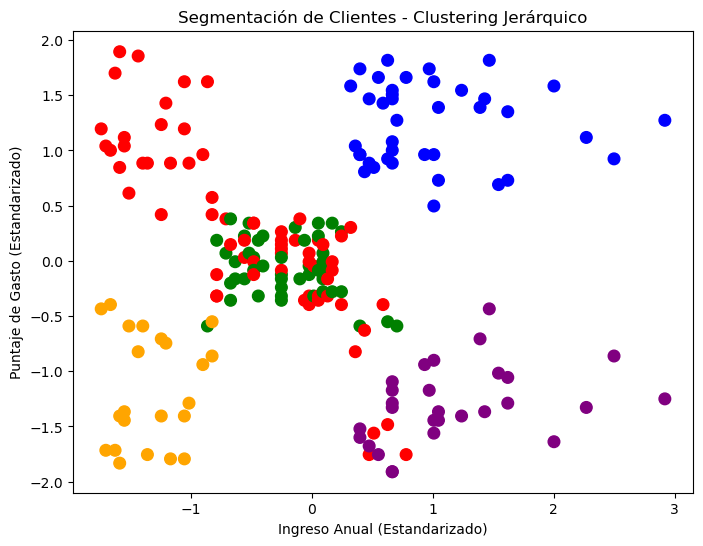

In [40]:
#Visualización de los clusters
colors = ['red', 'green', 'blue', 'purple', 'orange']
asignar = [colors[i] for i in labels]

plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=asignar, s=70)
plt.title("Segmentación de Clientes - Clustering Jerárquico")
plt.xlabel("Ingreso Anual (Estandarizado)")
plt.ylabel("Puntaje de Gasto (Estandarizado)")
plt.show()